In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/Mukund94/SVM-30th-Sep-and-1st-Oct-2023-NB-Classification-Confusion-Metrix-/main/predictive_maintenance.csv')

In [7]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
115,116,L47295,L,298.8,308.6,1431,45.7,97,0,No Failure
3114,3115,M17974,M,299.9,309.2,1683,30.5,13,0,No Failure
4530,4531,L51710,L,302.5,310.4,1487,42.0,152,0,No Failure
8223,8224,L55403,L,299.1,310.5,1329,54.9,58,0,No Failure
9960,9961,L57140,L,298.2,307.8,1575,35.0,137,0,No Failure
5565,5566,L52745,L,302.4,311.9,1671,29.9,204,0,No Failure
2207,2208,L49387,L,299.8,309.2,1591,37.5,109,0,No Failure
7785,7786,L54965,L,300.2,311.5,1383,42.1,60,0,No Failure
5146,5147,L52326,L,304.4,313.6,1585,38.9,9,0,No Failure
5099,5100,L52279,L,304.2,313.5,1438,50.1,100,0,No Failure


In [8]:
df.shape

(10000, 10)

In [9]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [10]:
df.describe(include="all")

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,No Failure
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,9652
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,NaN
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,NaN
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,NaN
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,NaN
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,NaN
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,NaN


In [11]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [12]:
##dropping unneccesary columns
df=df.drop(["UDI","Product ID"],axis=1)


In [13]:
df.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8320,M,298.8,309.7,1453,47.7,101,0,No Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
7046,M,300.7,310.5,1863,22.2,111,0,No Failure
3784,L,302.2,310.8,1744,29.7,16,0,No Failure
9032,L,297.4,308.3,1723,28.8,33,0,No Failure
875,M,295.8,306.3,1444,45.5,76,0,No Failure
6562,M,301.5,310.7,1871,21.3,152,0,No Failure
1932,M,298.1,308.0,1686,29.3,35,0,No Failure
8942,L,297.3,308.3,2188,17.0,32,0,No Failure
1708,L,298.2,307.8,1627,31.5,64,0,No Failure


In [14]:
## converting temperaure from kelvin to celcius
df["Air temperature [K]"]=df["Air temperature [K]"]-273
df["Process temperature [K]"]=df["Process temperature [K]"]-273

## renaming the columns
df.rename(columns={"Air temperature [K]":"Air temperature [C]","Process temperature [K]":"Process temperature [C]"},inplace=True)

In [15]:
df["Tempearture Difference"]=df["Process temperature [C]"]-df["Air temperature [C]"]

In [16]:
df.sample(10)

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Tempearture Difference
9920,H,25.5,35.7,1450,43.9,28,0,No Failure,10.2
9686,L,26.1,37.1,1486,40.7,39,0,No Failure,11.0
2051,M,26.4,36.2,1470,44.4,135,0,No Failure,9.8
5387,L,29.8,39.2,1433,50.0,216,0,No Failure,9.4
4973,L,30.8,39.7,1461,38.2,188,0,No Failure,8.9
1443,L,25.9,37.1,1602,38.2,58,0,No Failure,11.2
1425,L,25.6,36.7,1356,54.0,6,0,No Failure,11.1
4262,L,29.6,38.0,2001,20.7,137,0,No Failure,8.4
8418,L,25.9,37.2,1971,23.2,155,0,No Failure,11.3
60,L,25.8,36.1,1393,52.6,167,0,No Failure,10.3


# **EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='Target', ylabel='count'>

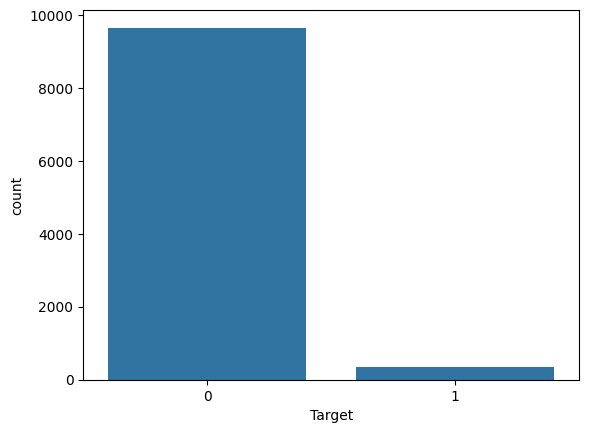

In [17]:
sns.countplot(data=df,x="Target")

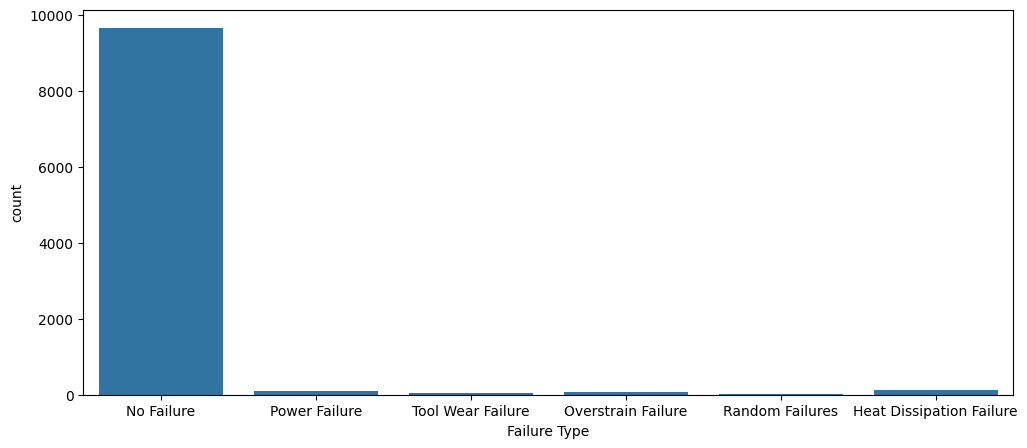

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Failure Type")
plt.show()

In [19]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

<Figure size 1000x700 with 0 Axes>

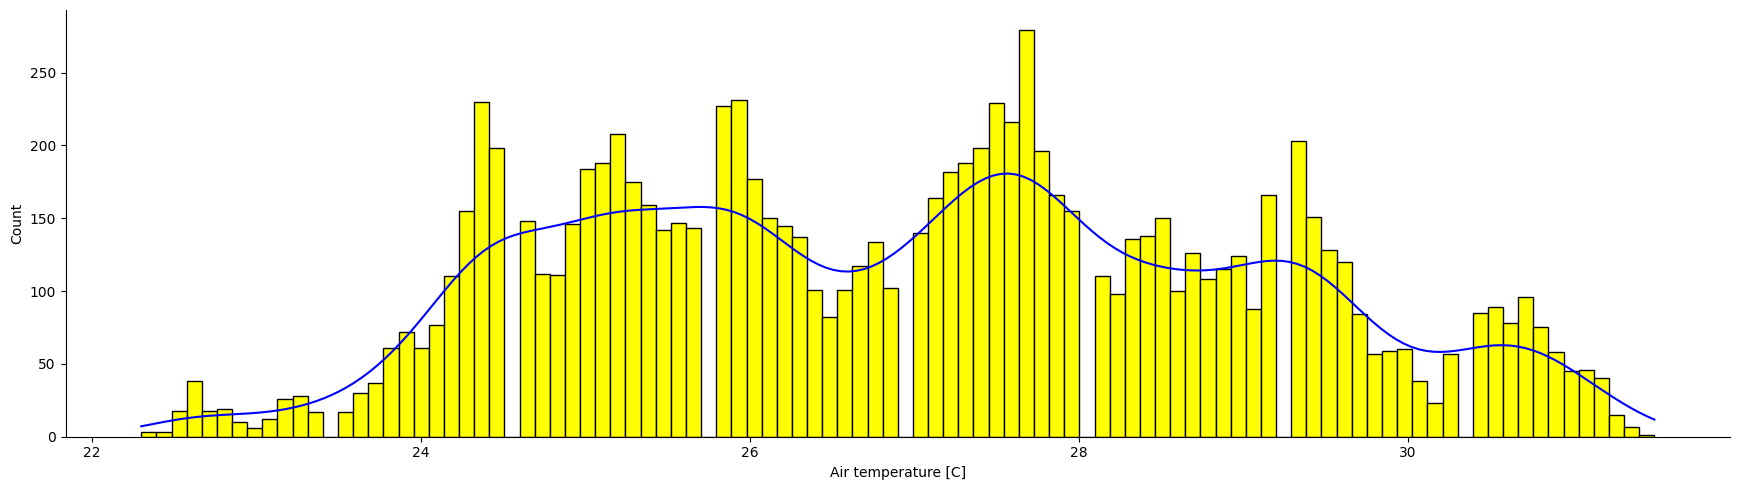

In [20]:
plt.figure(figsize=(10,7))
sns.displot(data= df,x="Air temperature [C]",kde=True,facecolor='yellow',height=5, aspect=3.5, bins=100,color='blue')

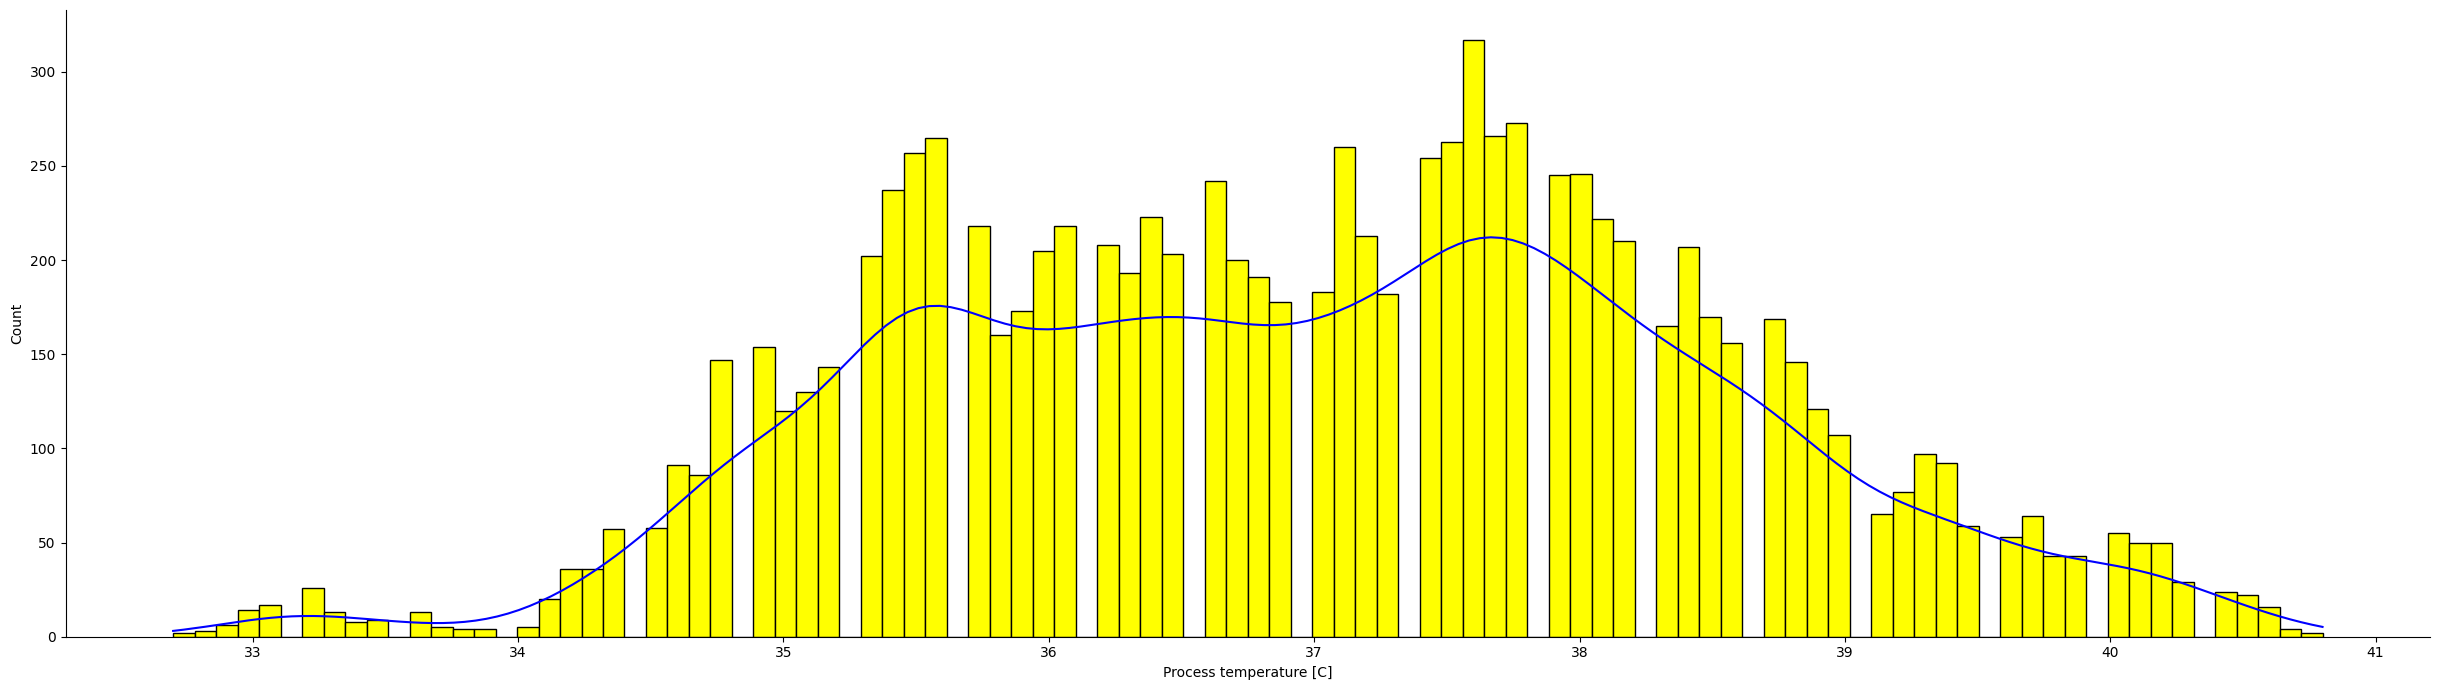

In [21]:
sns.displot(data= df,x="Process temperature [C]",kde=True, facecolor='yellow',aspect=3.5,height=7,bins=100,color='blue')

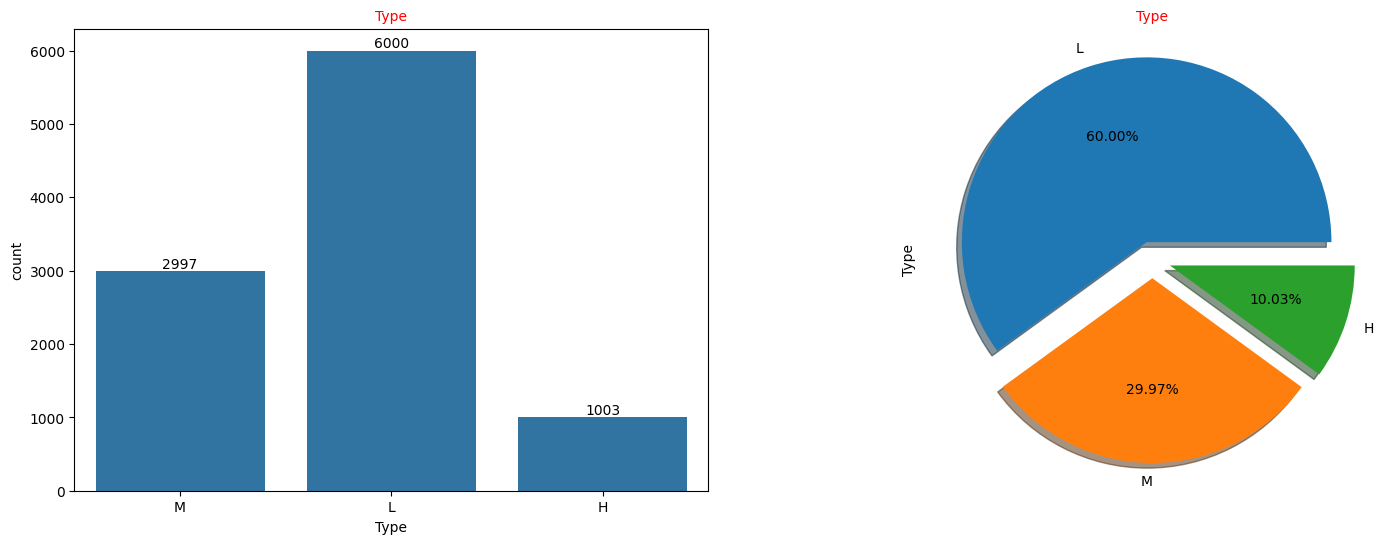

In [22]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

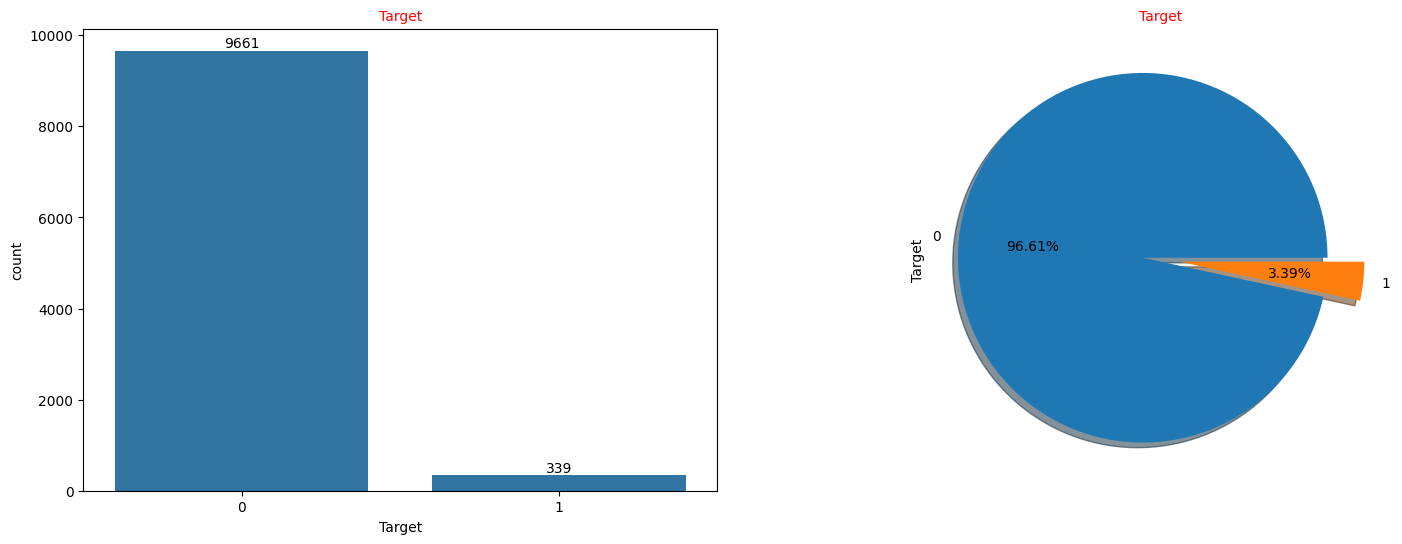

In [23]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

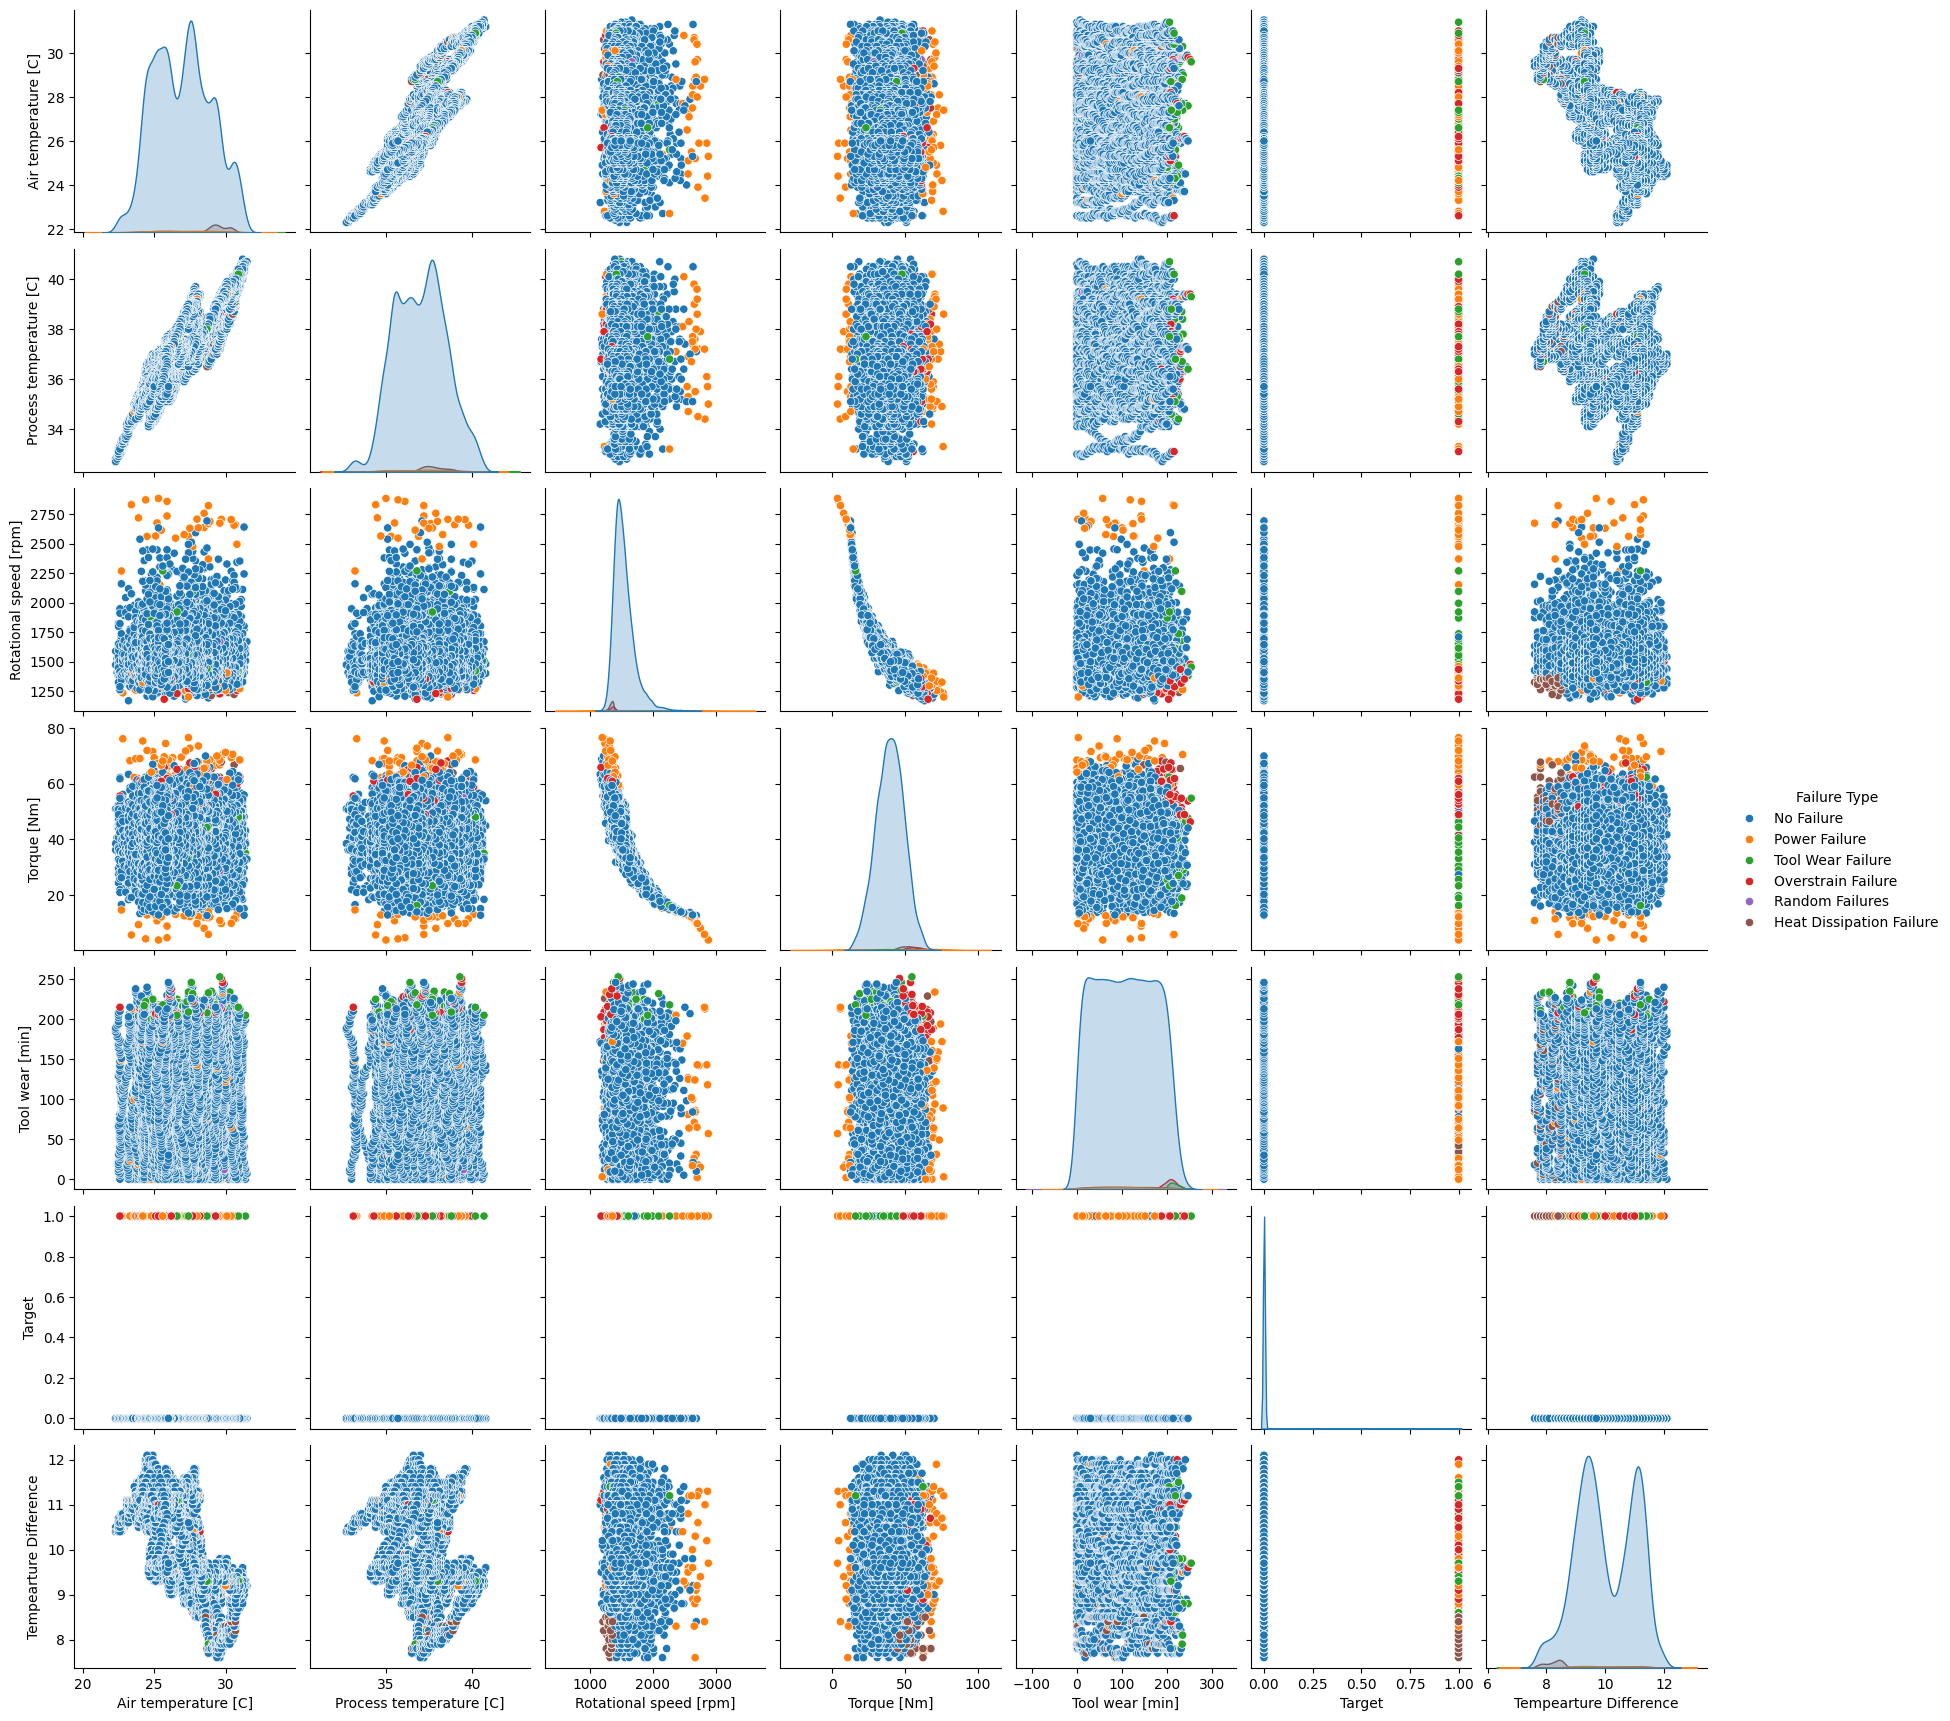

In [24]:
sns.pairplot(data=df,hue='Failure Type')

In [25]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [26]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Tempearture Difference
0,1,25.1,35.6,1551,42.8,0,0,1,10.5
1,2,25.2,35.7,1408,46.3,3,0,1,10.5


In [27]:
df.dtypes

Type                         int64
Air temperature [C]        float64
Process temperature [C]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int64
Tempearture Difference     float64
dtype: object

# Logistic Regression Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
x=df.drop(['Failure Type'],axis=1)
y=df['Failure Type'].values

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)


In [31]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
predictions=reg.predict(x_test)
accuracy_score(y_test,predictions)

0.9673333333333334

In [34]:
reg_train_accuracy=round(reg.score(x_train,y_train)*100,2)
reg_accuracy=round(accuracy_score(predictions,y_test)*100,2)

In [35]:
print('Training Accuracy Score:',reg_train_accuracy,'%')
print('Test Accuracy Score:',reg_accuracy,"%")
print('\033[1m-------------------------------------------------\033[0m')
print('Training Accuracy:',classification_report(y_test,predictions))
print('\033[1m-------------------------------------------------\033[0m')

Training Accuracy Score: 96.63 %
Test Accuracy Score: 96.73 %
-------------------------------------------------
Training Accuracy:               precision    recall  f1-score   support

           1       0.97      1.00      0.98      2899
           2       1.00      0.03      0.06        31
           3       0.00      0.00      0.00        10
           4       0.42      0.19      0.26        26
           5       0.00      0.00      0.00         5
           6       0.50      0.03      0.06        29

    accuracy                           0.97      3000
   macro avg       0.48      0.21      0.23      3000
weighted avg       0.96      0.97      0.95      3000

-------------------------------------------------


# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [37]:
y_pred = classifier.predict(x_test)


In [38]:
accuracy_score(y_test, y_pred)


0.993

In [39]:
log_train2=round(classifier.score(x_train,y_train)*100,2)
log_accuracy2=round(accuracy_score(y_pred,y_test)*100,2)

In [40]:
print("Training Accuracy :",log_train2,"%")
print("Training Accuracy :",log_accuracy2,"%")
print("\033[1m------------------------------------------\033[0m")
print("Training Accuracy :",classification_report(y_test,y_pred))
print("\033[1m------------------------------------------\033[0m")

Training Accuracy : 99.43 %
Training Accuracy : 99.3 %
------------------------------------------
Training Accuracy :               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2899
           2       0.77      0.77      0.77        31
           3       1.00      0.80      0.89        10
           4       0.93      1.00      0.96        26
           5       0.00      0.00      0.00         5
           6       0.80      0.97      0.88        29

    accuracy                           0.99      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.99      0.99      0.99      3000

------------------------------------------


# Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
classifier1 = SVC(kernel='sigmoid', random_state=0)
classifier1.fit(x_train, y_train)


SVC(kernel='sigmoid', random_state=0)

In [43]:
y1_pred= classifier1.predict(x_test)


In [44]:
cm1= confusion_matrix(y_test, y1_pred)
cm1

array([[2878,    0,    0,    0,    0,   21],
       [  21,    0,    0,    0,    0,   10],
       [   9,    0,    0,    0,    0,    1],
       [  26,    0,    0,    0,    0,    0],
       [   5,    0,    0,    0,    0,    0],
       [  29,    0,    0,    0,    0,    0]])

In [45]:
accuracy_score(y_test, y1_pred)


0.9593333333333334

In [46]:
log_train1=round(classifier1.score(x_train,y_train)*100,2)
log_accuracy1=round(accuracy_score(y1_pred,y_test)*100,2)

In [47]:
print("Training Accuracy :",log_train1,"%")
print("Training Accuracy :",log_accuracy1,"%")
print("\033[1m------------------------------------------\033[0m")
print("Training Accuracy :",classification_report(y_test,y1_pred))
print("\033[1m------------------------------------------\033[0m")

Training Accuracy : 95.93 %
Training Accuracy : 95.93 %
------------------------------------------
Training Accuracy :               precision    recall  f1-score   support

           1       0.97      0.99      0.98      2899
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        29

    accuracy                           0.96      3000
   macro avg       0.16      0.17      0.16      3000
weighted avg       0.94      0.96      0.95      3000

------------------------------------------


# K-Nearest Neighbour(KNN)

In [48]:
## KNN is another supervised learning technique, used for regression and classification model.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=25)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9674285714285714

In [53]:
knn.score(x_test,y_test)

0.967

In [54]:
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.967

In [55]:
knn_train_accuracy=round(knn.score(x_train,y_train)*100,2)
knn.accuracy=round(accuracy_score(pred,y_test)*100,2)

In [56]:
print('KNN Training Accuracy Score:',knn_train_accuracy,'%')
print('KNN Test Accuracy Score:',knn.accuracy,"%")
print('\033[1m-------------------------------------------------------------\033[0m')
print('KNN Training Accuracy:',classification_report(y_test,pred))


KNN Training Accuracy Score: 96.74 %
KNN Test Accuracy Score: 96.7 %
-------------------------------------------------------------
KNN Training Accuracy:               precision    recall  f1-score   support

           1       0.97      1.00      0.98      2899
           2       0.60      0.19      0.29        31
           3       0.00      0.00      0.00        10
           4       0.50      0.04      0.07        26
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        29

    accuracy                           0.97      3000
   macro avg       0.34      0.21      0.22      3000
weighted avg       0.95      0.97      0.95      3000



In [57]:
conf_matrix=confusion_matrix(y_test,pred)
conf_matrix

array([[2894,    4,    0,    1,    0,    0],
       [  25,    6,    0,    0,    0,    0],
       [  10,    0,    0,    0,    0,    0],
       [  25,    0,    0,    1,    0,    0],
       [   5,    0,    0,    0,    0,    0],
       [  29,    0,    0,    0,    0,    0]])

# Dicision-Tree Classifier

used on both classifiers and regression but leads to overfitting (i.e., difference in test and train score is more than 5%).

control the overfitting using a  technique called **Pruning**:




In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3)

In [59]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
dtc.score(x_train,y_train)

0.9911428571428571

In [61]:
dtc.score(x_test,y_test)

0.9903333333333333

In [62]:
df1=pd.read_csv('https://raw.githubusercontent.com/preetisharma22/Datasets/main/concrete.csv')
df1.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51


In [63]:
X=df1.drop(['strength'],axis=1)
Y=df1['strength']

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2)

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [66]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()

In [67]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [68]:
dtr.score(X_train,Y_train)

0.49355534387639255

In [69]:
dtr.score(X_test,Y_test)

0.45631997930863066

# Bagging Classifier

In [138]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(n_estimators=70)

In [139]:
x=df.drop(['Failure Type'],axis=1)
y=df['Failure Type'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=70)

In [140]:
bg.fit(x_train,y_train)

BaggingClassifier(n_estimators=70)

In [141]:
bg.score(x_train,y_train)

1.0

In [142]:
bg.score(x_test,y_test)

0.9953333333333333